In [70]:
import pandas as pd
# ep0 = pd.read_csv('./outputs/anli/epoch_0_predictions.csv')
# ep1 = pd.read_csv('./outputs/anli/epoch_1_predictions.csv')
# ep2 = pd.read_csv('./outputs/anli/epoch_2_predictions.csv')
# ep3 = pd.read_csv('./outputs/anli/epoch_3_predictions.csv')
# ep4 = pd.read_csv('./outputs/anli/epoch_4_predictions.csv')

ep0 = pd.read_csv('./outputs/mcq/epoch_0_predictions.csv')
ep1 = pd.read_csv('./outputs/mcq/epoch_1_predictions.csv')
ep2 = pd.read_csv('./outputs/mcq/epoch_2_predictions.csv')
ep3 = pd.read_csv('./outputs/mcq/epoch_3_predictions.csv')
ep4 = pd.read_csv('./outputs/mcq/epoch_4_predictions.csv')

In [71]:
import numpy as np
difficulty = []
confidence = []
for i in range((ep4.shape[0])):
#     if ep0.iloc[i]['label'] >3:
#         print(ep0.iloc[i]['label']+2)
    val1 = ep0.iloc[i][int(ep0.iloc[i]['label'])+2]
    val2 = ep1.iloc[i][int(ep1.iloc[i]['label'])+2]
    val3 = ep2.iloc[i][int(ep2.iloc[i]['label'])+2]
    val4 = ep3.iloc[i][int(ep3.iloc[i]['label'])+2]
    val5 = ep4.iloc[i][int(ep4.iloc[i]['label'])+2]
    
    confidence.append((val1+val2+val3+val4+val5)/5)
    difficulty.append(np.std([val1,val2,val3,val4,val5]))
#     confidence.append((val1+val2+val3)/3)
#     difficulty.append(np.std([val1,val2,val3]))
    

<AxesSubplot:>

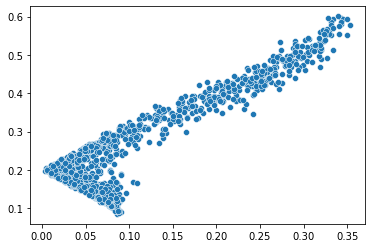

In [72]:
import seaborn as sns
sns.scatterplot(x= difficulty, y = confidence)

In [4]:
confidence_sorted_indices = sorted(range(len(confidence)),key=confidence.__getitem__)[::-1]

In [6]:
confidence[confidence_sorted_indices[1500]]

0.767923554778099

In [7]:
train_df = pd.read_csv('./mcq/train.csv')
train_df = train_df.iloc[:5000]

In [8]:
selected_data_easy = train_df.iloc[confidence_sorted_indices[:1500]]
selected_data_ambi = train_df.iloc[confidence_sorted_indices[1500:4000]]
selected_data_hard = train_df.iloc[confidence_sorted_indices[4000:]]

In [11]:
# selected_data_easy.to_csv('./anli/selected_data_easy.csv')
# selected_data_ambi.to_csv('./anli/selected_data_ambi.csv')
# selected_data_hard.to_csv('./anli/selected_data_hard.csv')

In [9]:
selected_data_easy.to_csv('./mcq/selected_data_easy.csv')
selected_data_ambi.to_csv('./mcq/selected_data_ambi.csv')
selected_data_hard.to_csv('./mcq/selected_data_hard.csv')

In [22]:
train_easy_50_hard_100 = pd.concat([selected_data_easy.iloc[:750], selected_data_hard])
train_easy_50_hard_100.to_csv('./mcq/train_easy_50_hard_100.csv')

In [23]:
train_easy_75_hard_100 = pd.concat([selected_data_easy.iloc[:1125], selected_data_hard])
train_easy_75_hard_100.to_csv('./mcq/train_easy_75_hard_100.csv')

In [24]:
train_easy_100_hard_100 = pd.concat([selected_data_easy, selected_data_hard])
train_easy_100_hard_100.to_csv('./mcq/train_easy_100_hard_100.csv')

In [25]:
train_easy_50_ambi_50_hard_100 = pd.concat([selected_data_easy.iloc[:750], selected_data_ambi.iloc[:1250],selected_data_hard])
train_easy_50_ambi_50_hard_100.to_csv('./mcq/train_easy_50_ambi_50_hard_100.csv')

In [26]:
train_easy_50_ambi_50 = pd.concat([selected_data_easy.iloc[:750], selected_data_ambi.iloc[:1250]])
train_easy_50_ambi_50.to_csv('./mcq/train_easy_50_ambi_50.csv')

# need to train later
train_easy_75_ambi_100 = pd.concat([selected_data_easy.iloc[:1125], selected_data_ambi])
train_easy_75_ambi_100.to_csv('./mcq/train_easy_75_ambi_100.csv')
train_easy_100_ambi_100 = pd.concat([selected_data_easy, selected_data_ambi])
train_easy_100_ambi_100.to_csv('./mcq/train_easy_100_ambi_100.csv')

In [27]:
train_ambi_50_hard_50 = pd.concat([selected_data_ambi.iloc[:1250], selected_data_hard.iloc[:500]])
train_ambi_50_hard_50.to_csv('./mcq/train_ambi_50_hard_50.csv')
train_ambi_75_hard_100 = pd.concat([selected_data_ambi.iloc[:1875], selected_data_hard])
train_ambi_75_hard_100.to_csv('./mcq/train_ambi_75_hard_100.csv')
train_ambi_100_hard_100 = pd.concat([selected_data_ambi, selected_data_hard])
train_ambi_100_hard_100.to_csv('./mcq/train_ambi_100_hard_100.csv')

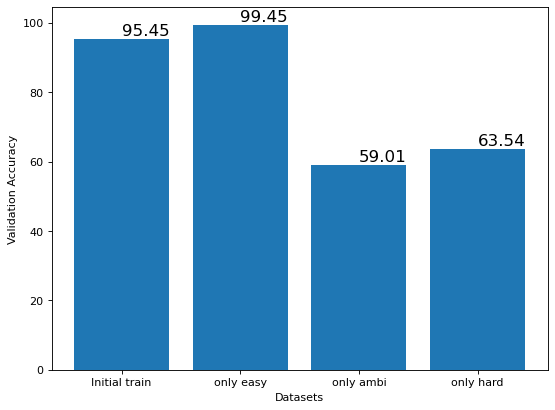

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

x = ('Initial train', 'only easy', 'only ambi', 'only hard')
y = (95.45, 99.45, 59.01, 63.54)

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Datasets')
plt.ylabel('Validation Accuracy')
# for i in range(len(y)):
#     plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
#     #plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()